In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset=pd.read_csv('Data.csv')

In [ ]:
dataset.head()

,f1,f2,f3,f4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
dataset.shape

(150, 4)

In [ ]:

dataset.describe()

,f1,f2,f3,f4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


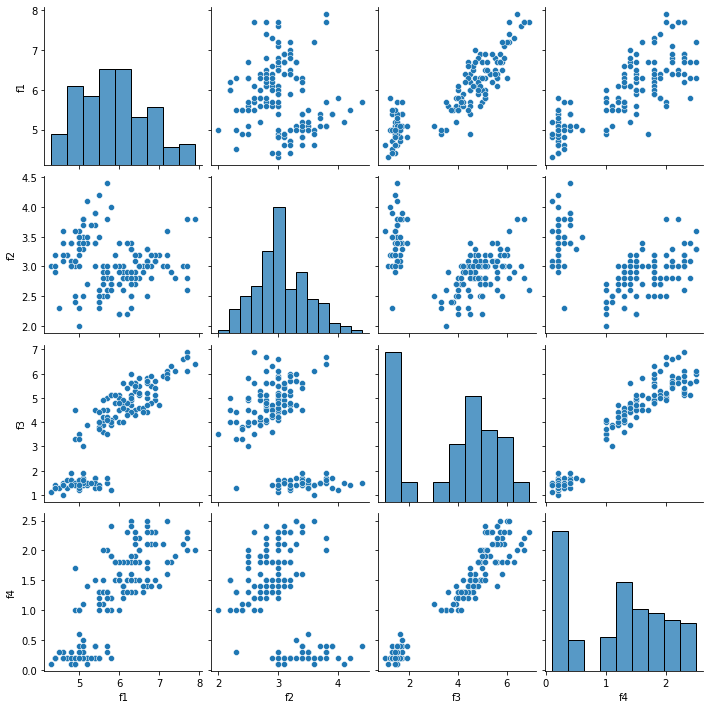

In [ ]:
import seaborn as sb
sb.pairplot(dataset)


In [ ]:
#PCA

#let us write the function for the pca

In [ ]:
def PCA(X , num_components):
    dataset_meaned = dataset - np.mean(dataset , axis = 0)
    cov_mat = np.cov(dataset_meaned  , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    X_dataset = (eigenvector_subset.transpose().dot( dataset_meaned.transpose() )).transpose()
    return X_dataset

In [ ]:
X_dataset=PCA(dataset, 2)
#X_dataset

In [ ]:
new_data = pd.DataFrame( X_dataset, columns = ['PC1','PC2'])

In [ ]:
new_data .head()

,PC1,PC2
0,2.684126,0.319397
1,2.714142,-0.177001
2,2.888991,-0.144949
3,2.745343,-0.318299
4,2.728717,0.326755


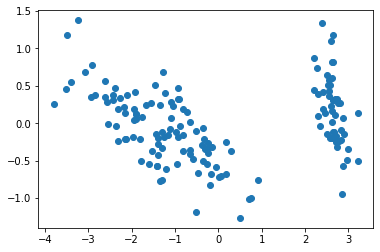

In [ ]:
# Plot the results of the two first Principal Components
import matplotlib.pyplot as plt
plt.scatter(new_data ['PC1'], new_data ['PC2'])

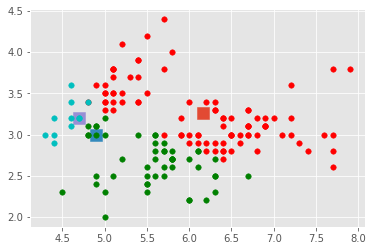

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd 
style.use('ggplot')

class K_Means:
    def __init__(self, k =3, tol = 0.0001, max_iter = 400):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, data):
        self.centroids = {}

#initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
        for i in range(self.k):
            self.centroids[i] = data[i]

#begin iterations
        for i in range(self.max_iter):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

#find the distance between the point and cluster; choose the nearest centroid
        for features in data:
            distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
            clusters= distances.index(min(distances))
            self.classes[clusters].append(features)

            previous = dict(self.centroids)

            #average the cluster datapoints to re-calculate the centroids
        for classification in self.classes:
            self.centroids[clusters] = np.average(self.classes[clusters], axis = 0)

            isOptimal = True

            for centroid in self.centroids:

                original_centroid = previous[centroid]
                curr = self.centroids[centroid]

                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tol:
                    isOptimal = False

#break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
                if isOptimal:
                    break

    def pred(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        clusters = distances.index(min(distances))
        return classification
    

def main():
	df = pd.read_csv("Data.csv")
	#df = df[['one', 'two']]
	#ataset = df.astype(float).values.tolist()

	X = df.values #returns a numpy array
	
	model = K_Means(3)
	model.fit(X)

	# Plotting starts her

	colors = ["r", "g", "c", "b", "k"]

	for centroid in model.centroids:
		plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1], s = 130, marker = "s")
    
	for clusters in model.classes:
		color = colors[clusters]
		for features in model.classes[clusters]:
			plt.scatter(features[0], features[1], color = color,s = 30)
	
	plt.show()
 

if __name__ == "__main__":
	main()
